#Importation des librairies et bibliothéques

In [1]:
# Importation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from time import process_time
from time import perf_counter
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Prétraitement des données :

In [3]:
# chargement des données
data = pd.read_csv("brca.csv")
data.head()  # afficher les 5 premieres lignes de notre dataset

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [4]:
# Pretraitement des données
data.drop(["Unnamed: 0"],axis=1,inplace=True) # effacer toute la colonne "Unnamed: 0"
print(data.shape)
data.head()

(569, 31)


,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [5]:
print(data["y"].unique()) # Affichage des sorties qui existent (2 sorties : "M" et "B")
data["y"].value_counts() # compter les "M" et les "B"

['B' 'M']


B    357
M    212
Name: y, dtype: int64

In [6]:
data.y = [1 if each == "M" else 0 for each in data.y] # on remplace les characteres par des valeurs binaires 1 si "m", 0 si "B"
y = data.y.values
x_data = data.drop(["y"], axis=1) # on efface la colonne des y
x_data.head() # x_data devient une matrice de dimension (5x30)

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [7]:
# normalisation des données
x = (x_data - x_data.min())/(x_data.max() - x_data.min()).values
x = x.values
type(x)
#y

numpy.ndarray

In [8]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Transposer les ensembles d'entraînement et de test
x_train = x_train.T
x_test = x_test.T
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

print("x_train:", x_train.shape) # (30, 455)
print("x_test:", x_test.shape) # (30, 114)
print("y_train:", y_train.shape) # (455, 1)
print("y_test:", y_test.shape) # (114, 1)



x_train: (30, 455)
x_test: (30, 114)
y_train: (455,)
y_test: (114,)


# Methode de gradient

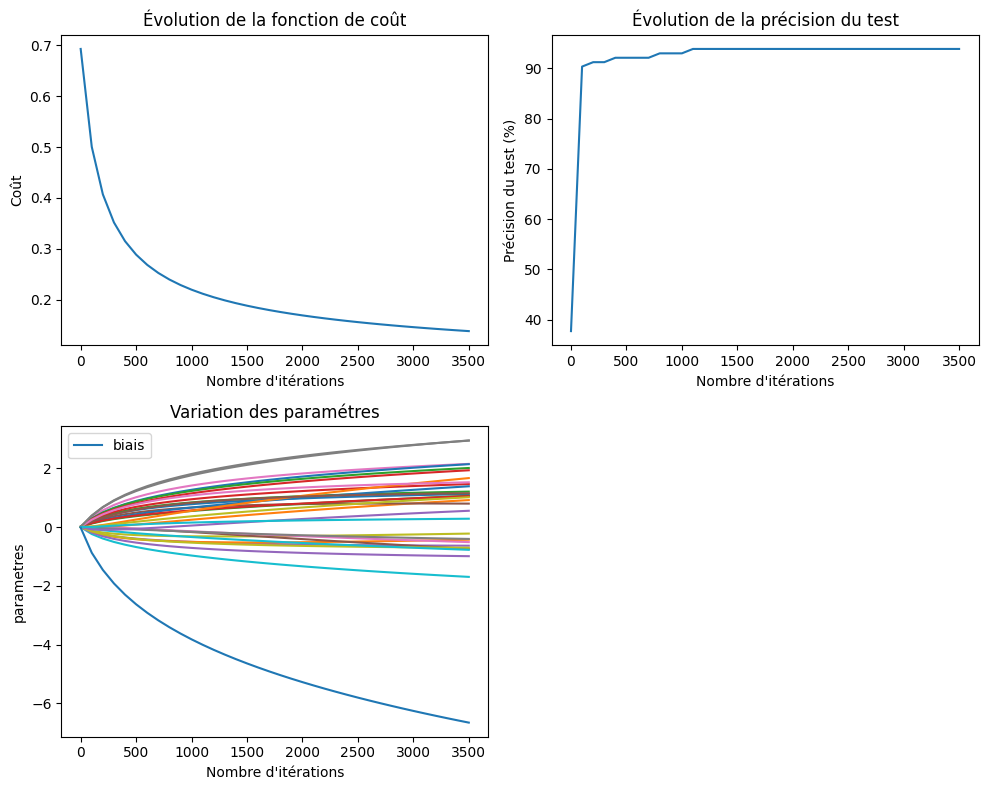

Le temps d'exécution de logistic_regression est de : 2.0466337270001986 secondes.


In [20]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head



def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}

    return cost,gradients




# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    index = []
    accuracies = []
    biais = []
    wi = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)

        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        wl = w.tolist()
        if i % 100 == 0:
            cost_list.append(cost)
            index.append(i)
            y_pred_test = predict(w, b, x_test)
            accuracy = np.mean(y_pred_test == y_test) * 100
            accuracies.append(accuracy)
            wi.append(wl)
            biais.append(float(b))


    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}

    wi = np.array(wi)
    return wi,biais, cost_list, accuracies



# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction



#logistic_regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    wi, biais, costs, accuracies = update(w, b, x_train, y_train, learning_rate,num_iterations)


    # on trace les figures
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1)
    # Courbe de la fonction de coût en fonction des itérations
    plt.plot(np.arange(0,num_iterations,100),costs)
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Coût")
    plt.title("Évolution de la fonction de coût")

    plt.subplot(2,2,2)
    # Courbe de la précision du test en fonction des itérations
    plt.plot(np.arange(0,num_iterations,100),accuracies)
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Précision du test (%)")
    plt.title("Évolution de la précision du test")
    plt.subplot(2,2,3)
    # Courbe de l'evolution des parametres en fonction des itérations
    for i in range(len(w)):
          plt.plot(np.arange(0,num_iterations,100),wi[:,i])
    plt.plot(np.arange(0,num_iterations,100),biais,label='biais')
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("parametres")
    plt.title("Variation des paramétres")
    plt.legend()



    plt.tight_layout()
    plt.show()


#Exécution de la régression logistique avec SGD
t1_start = perf_counter()
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.1, num_iterations = 3600)
t1_stop = perf_counter()

print(f"Le temps d'exécution de logistic_regression est de : {t1_stop - t1_start} secondes.")